## Import the package

In [22]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### Read the csv file

In [23]:
file1="bank_loan_data.csv"
loan_df=pd.read_csv(file1)

In [24]:
loan_df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


### Seprated catgorical columns and numerical columns

In [25]:
cat=loan_df.select_dtypes(include="object")
num=loan_df.select_dtypes(exclude="object")

### Drope the loan ID

In [26]:
loan_df.drop('Loan_ID',axis=1,inplace=True)

In [27]:
loan_df.head(2)

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N


In [33]:
loan_df.isnull().sum()

Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

### we fill the missing values

In [60]:
for i in cat:
    #print(i)
    c=loan_df[i].mode()[0]
    loan_df[i]=loan_df[i].fillna(c)

### Catgorical columns analysis

In [61]:
cat=loan_df.select_dtypes(include="object")
cat.head(2)

,Gender,Married,Dependents,Education,Self_Employed,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,Urban,Y
1,Male,Yes,1,Graduate,No,Rural,N


## Frequencey Thable

In [69]:
loan_df['Gender'].value_counts()

Gender
Male      502
Female    112
Name: count, dtype: int64

In [83]:
keys=loan_df['Gender'].value_counts().keys()
value=loan_df['Gender'].value_counts().to_list()
d=pd.DataFrame(zip(keys,value),columns=['Gender','Count'],index=[1,2])
d

,Gender,Count
1,Male,502
2,Female,112


## Target columns Loan status

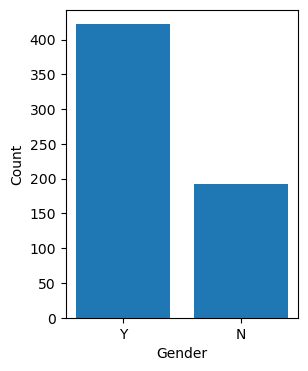

In [113]:
plt.figure(figsize=(3,4))
plt.bar(keys,value,data=loan_df)
plt.xlabel("Gender")
plt.ylabel("Count")
plt.show()

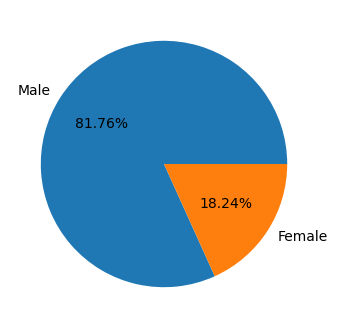

In [99]:
plt.figure(figsize=(4,4))
plt.pie(x=value,labels=keys,autopct="%0.2f%%")
plt.show()

### All frequency table

In [111]:
for i in cat:
    keys=loan_df[i].value_counts().keys()
    value=loan_df[i].value_counts().to_list()
    d=pd.DataFrame(zip(keys,value),columns=[i,'Count'])
    print(f"{d}")

   Gender  Count
0    Male    502
1  Female    112
  Married  Count
0     Yes    401
1      No    213
  Dependents  Count
0          0    360
1          1    102
2          2    101
3         3+     51
      Education  Count
0      Graduate    480
1  Not Graduate    134
  Self_Employed  Count
0            No    532
1           Yes     82
  Property_Area  Count
0     Semiurban    233
1         Urban    202
2         Rural    179
  Loan_Status  Count
0           Y    422
1           N    192


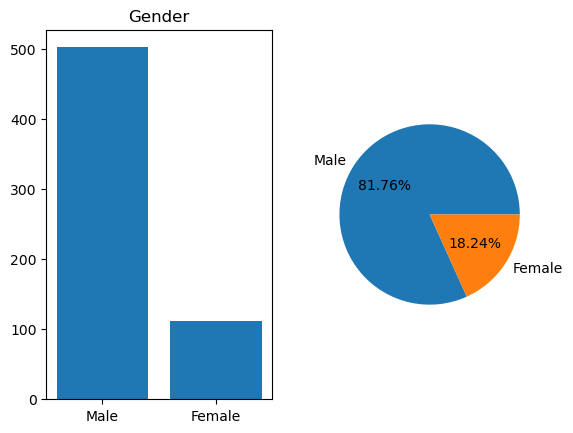

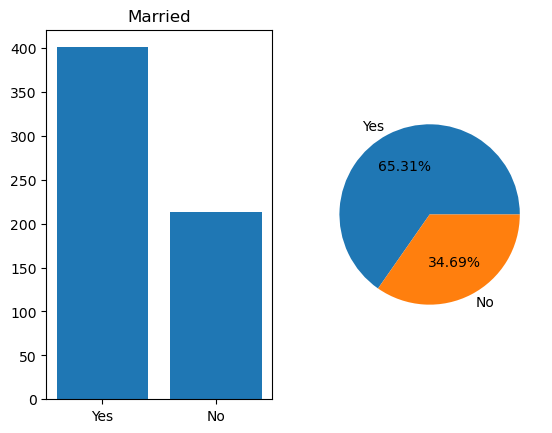

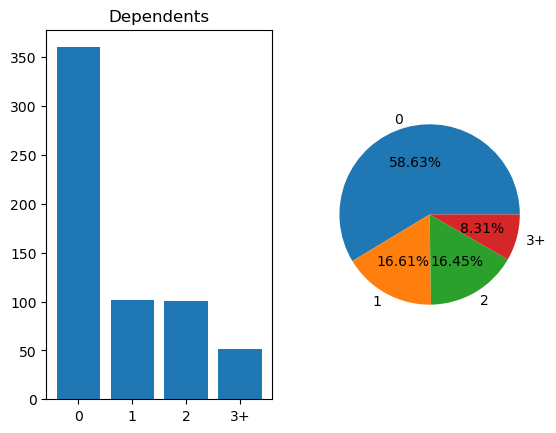

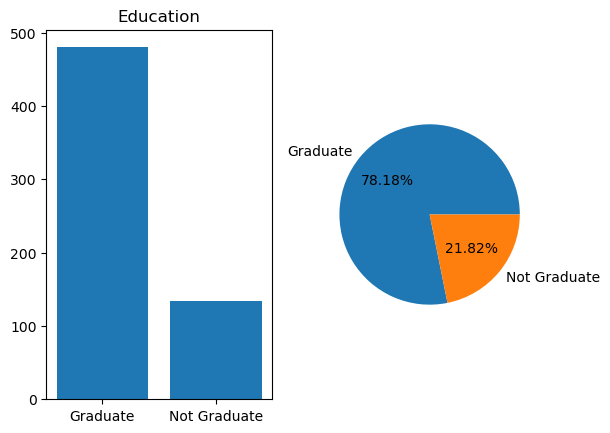

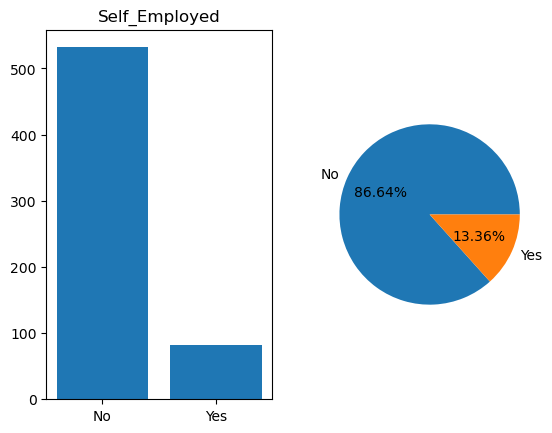

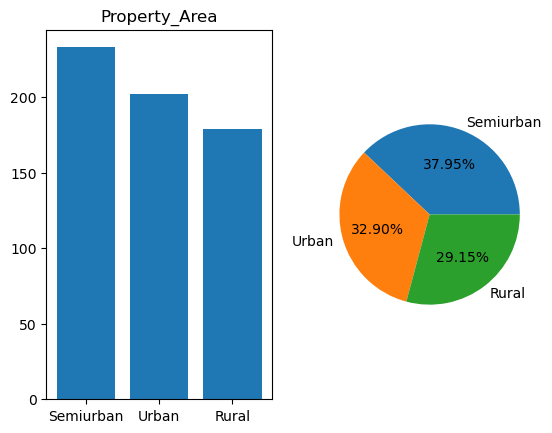

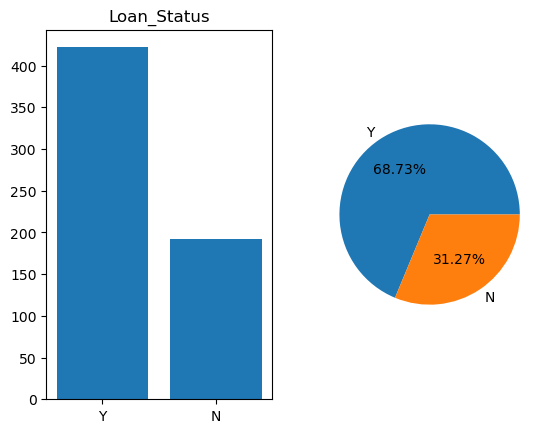

In [114]:
for i in cat:
    keys=loan_df[i].value_counts().keys()
    value=loan_df[i].value_counts().to_list()
    plt.subplot(1,2,1)
    plt.bar(keys,value,data=loan_df)
    plt.title(i)
    plt.subplot(1,2,2)
    plt.pie(x=value,labels=keys,autopct='%0.2f%%')
    plt.show()


## Numerical columns analysis

In [116]:
num.head(3)

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
0,5849,0.0,NaN,360.0,1.0
1,4583,1508.0,128.0,360.0,1.0
2,3000,0.0,66.0,360.0,1.0


In [129]:
q1=np.percentile(loan_df['ApplicantIncome'],25)
q2=np.percentile(loan_df['ApplicantIncome'],50)
q3=np.percentile(loan_df['ApplicantIncome'],75)
mean=round(loan_df['ApplicantIncome'].mean(),2)
median=round(loan_df['ApplicantIncome'].median(),2)

In [135]:
iqr=q3-q1
iqr
####################
up=q3+1.5*iqr
lb=q1-1.5*iqr

In [136]:
plt.hist

(10171.25, -1498.75)